In [2]:
import tensorflow as tf
from tensorflow.python import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import carregaDataset

# Predição Utilizando o Rede Neural Convencional do TensorFlow



# Foi efetudo três métodos para utilização de variáveis categóricas, no caso, a variável é um dia da semana

# **_Explicação de cada método:_**
> * ### ***dia_sequencia.***
  A lógica é apenas mudar o nome (string) do dia da semana para um valor, no caso, 1 para mon(segunda), 2 para tues(terça) ..., 5 para fri(sexta)
>
>
>Exemplo:
>
>
><table width="40px" border="1px">
        <tr border="1" height="60">
            <th width="80" style="text-align:center;">Dias Da Semana</th>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">1</td>
        </tr>
        <tr border="1" height="40">
        <td width="80" style="text-align:center;">2</td>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">3</td>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">4</td>
        </tr>
        <tr border="1" height="40">
            <td width="80" style="text-align:center;">5</td>
        </tr>
</table>

> * ### ***dia_seno_cosseno***
  Foram criado duas colunas e eliminado a coluna da string do dia da semana, as colunas criadas são: seno e cosseno, como são 5 dias da semana, pegamos o angulo total do circulo (360º) e dividimos por 5 (5  dias da semana), resultando 72º, ou seja, será 72 graus para cada dia da semana,assim sendo, mutiplicamos o valor do dia por 72 e depois aplicamos a formula de seno e cosseno
> 
>Exemplo:
> 
>
><table width="90%" border="1px" >
    <tr border="1" height="60">
    <th width="80" style="text-align:center;">DIA</th>
    <th width="80" style="text-align:center;">SENO</th>
    <th width="80" style="text-align:center;">COSSENO</th>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Segunda</td>
    <td width="80" style="text-align:center;">seno(1*72)</td>
    <td width="80" style="text-align:center;">cosseno(1*72)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Terça</td>
    <td width="80" style="text-align:center;">seno(2*72º)</td>
    <td width="80" style="text-align:center;">cosseno(2*72º)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Quarta</td>
    <td width="80" style="text-align:center;">seno(3*72º)</td>
    <td width="80" style="text-align:center;">cosseno(3*72º)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Quinta</td>
    <td width="80" style="text-align:center;">seno(4*72º)</td>
    <td width="80" style="text-align:center;">cosseno(4*72º)</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">Sexta</td>
    <td width="80" style="text-align:center;">seno(5*72º)</td>
    <td width="80" style="text-align:center;">cosseno(5*72º)</td>
    </tr>
</table>

>   
> * ### ***dia_get_dummies***
> Processo de codificação one-hot, para criar colunas de cada dia da semana e acescentando 
valor de 1 para a coluna do respectivo dia e zero para as demais.
>
> Exemplo:
>
>
><table width="90%" border="1px" >
    <tr border="1" height="60">
    <th width="80" style="text-align:center;">SEGUNDA</th>
    <th width="80" style="text-align:center;">TERÇA</th>
    <th width="80" style="text-align:center;">QUARTA</th>
    <th width="80" style="text-align:center;">QUINTA</th>
    <th width="80" style="text-align:center;">SEXTA</th>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1" height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    <td width="80" style="text-align:center;">0</td>
    </tr>
    <tr border="1"height="40">
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">0</td>
    <td width="80" style="text-align:center;">1</td>
    </tr>
</table>

## Método responsável para a separação dos dias sequencias para testes, no caso a variável L_lag é a determinação de quantos dias de atraso serão criados para os dados sequenciais.

>Exemplo:
>
>L_lag = 5, será 5 dias de dados de entrada
>
><table width="90%" height="70"border="1px" >
    <tr border="1">
    <th width="80" style="text-align:center;">Vt-5</th>
    <th width="80" style="text-align:center;">Vt-4</th>
    <th width="80" style="text-align:center;">Vt-3</th>
    <th width="80" style="text-align:center;">Vt-2</th>
    <th width="80" style="text-align:center;">Vt-1</th>
    <th width="80" style="text-align:center;">Vt</th>
    </tr>
    <tr border="1">
    <td width="80" style="text-align:center;">0.084</td>
    <td width="80" style="text-align:center;">0.043</td>
    <td width="80" style="text-align:center;">-0.15</td>
    <td width="80" style="text-align:center;">-0.53</td>
    <td width="80" style="text-align:center;">+0.05</td>
    <td width="80" style="text-align:center;">+0.32</td>
    </tr>
</table>

<br>
<br>

# Utilizando o tensorflow, com o modo sequential, no qual atribui uma sequencia de camadas para o modelo.
# Esse modelo é o Recorrente LSTM

In [3]:
def LSTM(shape):    
    modelo = tf.keras.Sequential([
        tf.keras.layers.LSTM(32, 
                             input_shape=shape, 
                             activation='tanh', 
                             recurrent_activation="linear", 
                             use_bias=True),
        tf.keras.layers.Dense(1)
    ])

#    modelo.compile(loss='mean_squared_error', optimizer='Adam',
#                    metrics=[tf.keras.metrics.MeanSquaredError()])
    modelo.compile(loss='mean_squared_error', 
                   optimizer=tf.keras.optimizers.Adam(
                       learning_rate=0.001,
                       use_ema=True,
                       ema_momentum=0.905,
                       ema_overwrite_frequency=4,
                       beta_1=0.95),                       
                    metrics=[tf.keras.metrics.MeanSquaredError()])


    return modelo
#Adam     =   0.40470130
#RMSprop  =   0.3894882940
#Adamax   =   0.377420865

In [12]:
#path = '/content/drive/MyDrive/Colab Notebooks/callbackDenseModel.h5'
#
#alpha = 1e-5
#
#checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=path,
#                                                monitor='loss',
#                                                verbose=1,
#                                                save_best_only=True,
#                                                mode='min',
#                                                )
#
#reducePL = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
#                                               factor=0.001, 
#                                               min_delta=alpha, 
#                                               patience=2, 
#                                               verbose=1)

# Sequências de Treinamentos com atualização do valor de beta, para a coluna **log_volatility**



In [5]:
df = carregaDataset.UpdateBeta(0.85)
x_train, y_train, x_test, y_test = carregaDataset.nysedf(df, 5)

modelo = LSTM((15,1))

modelo.fit(x_train, y_train, batch_size=20, epochs=50, verbose=1)

media = modelo.predict(x_test)

Epoch 1/50
214/214 [==============================] - 2s 5ms/step - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 2/50
214/214 [==============================] - 1s 5ms/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 3/50
214/214 [==============================] - 1s 5ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 4/50
214/214 [==============================] - 1s 4ms/step - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 5/50
214/214 [==============================] - 1s 4ms/step - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 6/50
214/214 [==============================] - 1s 5ms/step - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 7/50
214/214 [==============================] - 1s 4ms/step - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 8/50
214/214 [==============================] - 1s 5ms/step - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 9/50
214/214 [==============================] - 1s 5ms/step - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 10/5

134/134 [==============================] - 0s 2ms/step
R² Test =  0.3491894545223371
R² Train=  0.5299262794858965


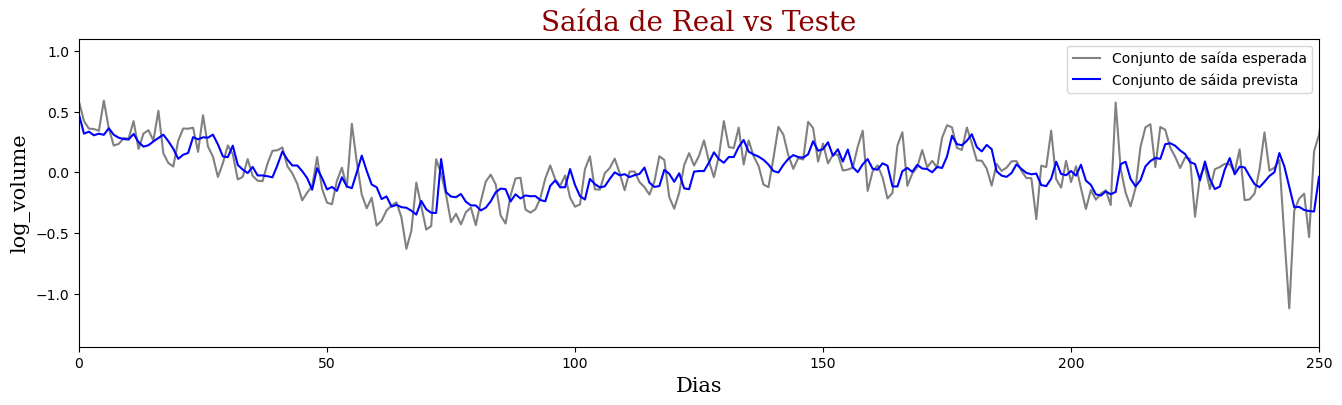

In [6]:
y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)

df_Final = pd.DataFrame()
df_Final['Beta=0.85'] = r2_score(y_test, y_modelpredict),

print ('R² Test = ', r2_score(y_test, y_modelpredict))
print ('R² Train= ', r2_score(y_train, y_modelTrain))
carregaDataset.plotResult(y_test, y_modelpredict)

In [23]:
df = UpdateBeta(0.90)
x_train, y_train, x_test, y_test = nysedf(5)

modelo = LSTM((15,1))

modelo.fit(x_train, y_train, batch_size=40, epochs=200, verbose=1)

media = modelo.predict(x_test)

Epoch 1/200
107/107 [==============================] - 2s 9ms/step - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 2/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 3/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 4/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 5/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0536 - mean_squared_error: 0.0536
Epoch 6/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 7/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 8/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 9/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0390 - mean_squared_error: 0.0390


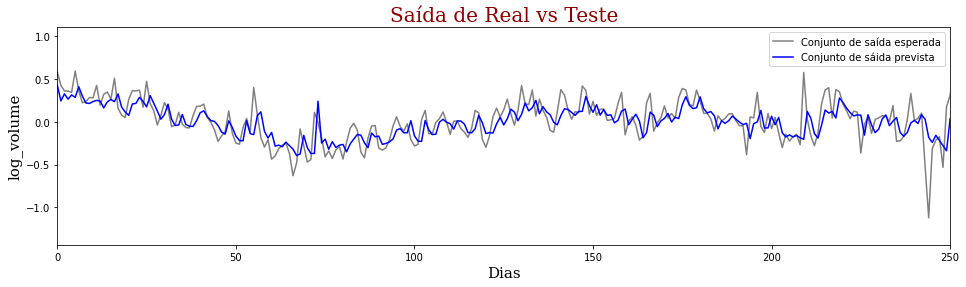

134/134 [==============================] - 1s 4ms/step
R² Test =  0.3989071090848443
R² Train=  0.5736863394239937


In [26]:
plotResult(y_test, media)


y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)
df_Final['Beta=0.90'] = score(y_test, y_modelpredict),

print ('R² Test = ', score(y_test, y_modelpredict))
print ('R² Train= ', score(y_train, y_modelTrain))


In [27]:
df = UpdateBeta(0.95)
x_train, y_train, x_test, y_test = nysedf(5)

modelo = LSTM((15,1))

modelo.fit(x_train, y_train, batch_size=40, epochs=200, verbose=1)

media = modelo.predict(x_test)

Epoch 1/200
107/107 [==============================] - 4s 15ms/step - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 2/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 3/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 4/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 5/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 6/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 7/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 8/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0536 - mean_squared_error: 0.0536
Epoch 9/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0514 - mean_squared_error: 0.051

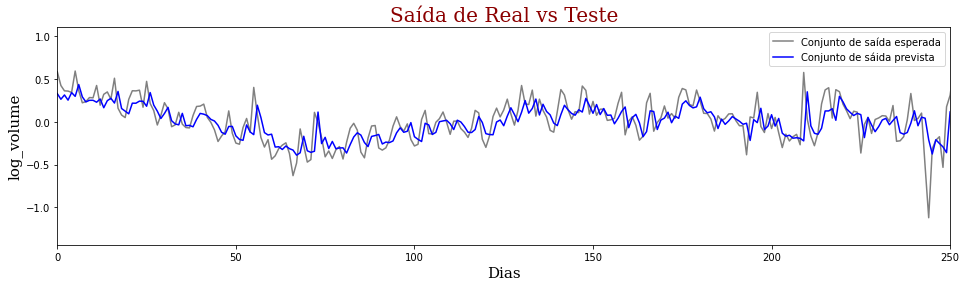

134/134 [==============================] - 1s 4ms/step
R² Test =  0.39136809050635335
R² Train=  0.5625772980592487


In [28]:
plotResult(y_test, media)


y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)
df_Final['Beta=0.95'] = score(y_test, y_modelpredict),

print ('R² Test = ', score(y_test, y_modelpredict))
print ('R² Train= ', score(y_train, y_modelTrain))

# Acrescentando uma coluna para os dias da semana.
#Dias Aleatórios, 1 segunda, 2, terça, ..., 5 sexta

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse_df.csv')

modelo = LSTM((16,1))

x_train, y_train, x_test, y_test = dia_sequencia(5)

modelo.fit(x_train, y_train, batch_size=40, epochs=200, verbose=1)

media = modelo.predict(x_test)

Epoch 1/200
107/107 [==============================] - 2s 10ms/step - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 2/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 3/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 4/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 5/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 6/200
107/107 [==============================] - 1s 12ms/step - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 7/200
107/107 [==============================] - 2s 14ms/step - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 8/200
107/107 [==============================] - 2s 14ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 9/200
107/107 [==============================] - 1s 12ms/step - loss: 0.0282 - mean_squared_error:

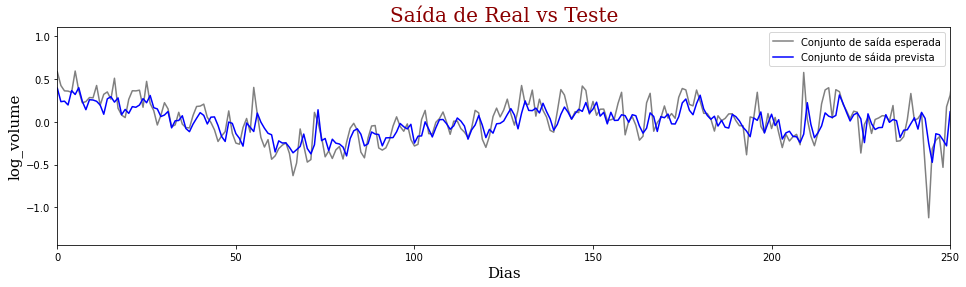

134/134 [==============================] - 1s 4ms/step
R² Test =  0.4497718393228013
R² Train=  0.5909327663257402


In [30]:
plotResult(y_test, media)


y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)
df_Final['Dias da Semana'] = score(y_test, y_modelpredict),



print ('R² Test = ', score(y_test, y_modelpredict))
print ('R² Train= ', score(y_train, y_modelTrain))

# Normalizando os dados da log_volatility, exemplo do histograma de sem normalização (cor laranja) e normalizado (cor azul), padrão para média no ponto zero.

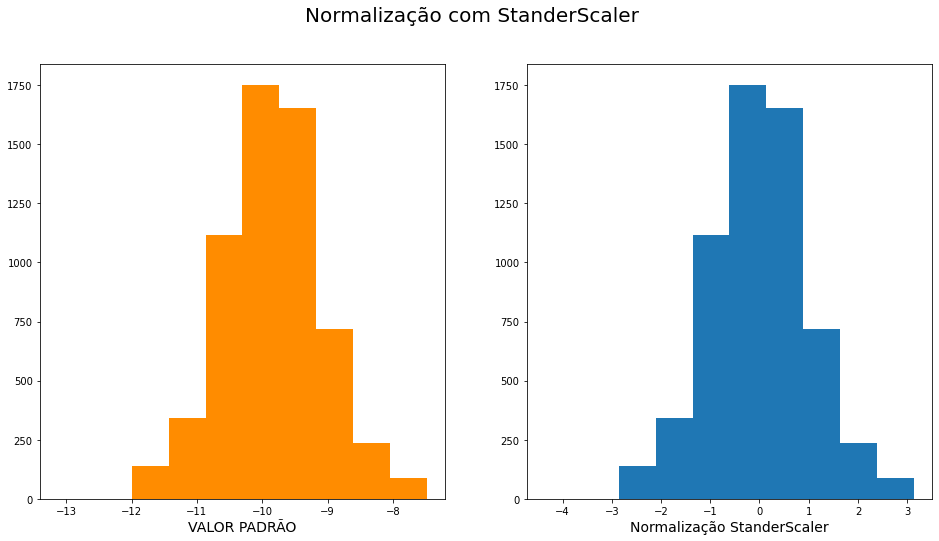

In [31]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse_df.csv')

scaler = StandardScaler()
df['log_volatility_stand'] = scaler.fit_transform(df[['log_volatility']])

plot_histograma('Normalização com StanderScaler', 'Normalização StanderScaler', df)

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse_df.csv')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df.log_volatility
df['log_volatility'] = scaler.fit_transform(df[['log_volatility']])

modelo = LSTM((16,1))

x_train, y_train, x_test, y_test = dia_sequencia(5)
modelo.fit(x_train, y_train, batch_size=40, epochs=200, verbose=1)
media = modelo.predict(x_test)

Epoch 1/200
107/107 [==============================] - 2s 10ms/step - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 2/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 3/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 4/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 5/200
107/107 [==============================] - 2s 15ms/step - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 6/200
107/107 [==============================] - 2s 15ms/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 7/200
107/107 [==============================] - 1s 12ms/step - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 8/200
107/107 [==============================] - 2s 15ms/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9/200
107/107 [==============================] - 2s 21ms/step - loss: 0.0518 - mean_squared_error:

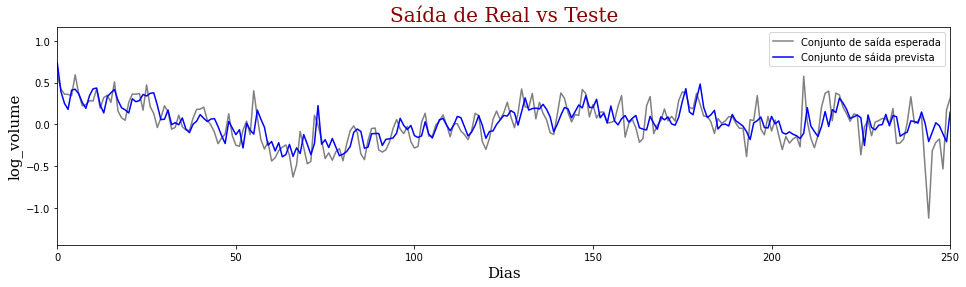

134/134 [==============================] - 1s 4ms/step
R² Test =  0.4031731127305085
R² Train=  0.6240446401236974


In [33]:
plotResult(y_test, media)


y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)
df_Final['Standardization'] = score(y_test, y_modelpredict),

print ('R² Test = ', score(y_test, y_modelpredict))
print ('R² Train= ', score(y_train, y_modelTrain))

# Outro mode de normalização de dados da log_volatility, exemplo do histograma de sem normalização (cor laranja) e normalizado (cor azul), padrão para média no ponto zero.

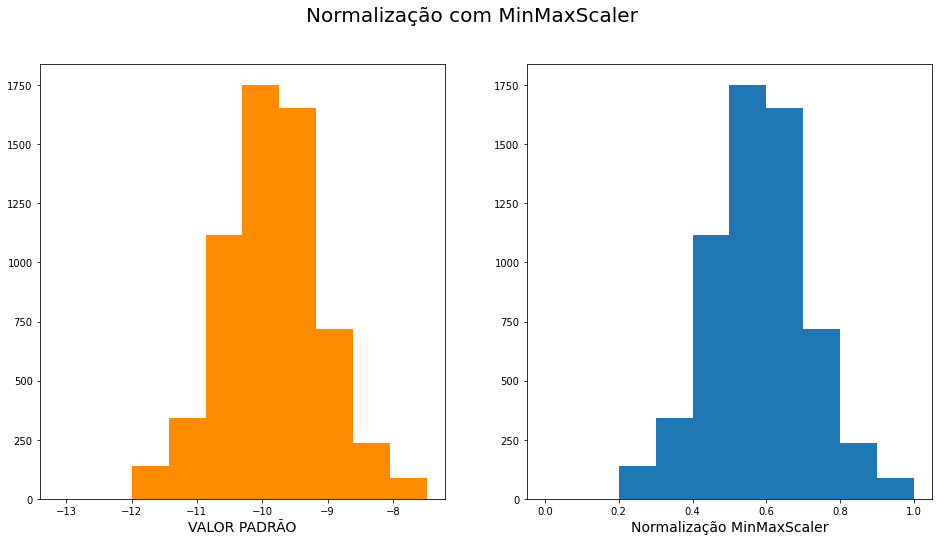

In [34]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse_df.csv')

scaler = MinMaxScaler()
df['log_volatility_stand'] = scaler.fit_transform(df[['log_volatility']])

plot_histograma("Normalização com MinMaxScaler", "Normalização MinMaxScaler", df)

Epoch 1/200
107/107 [==============================] - 3s 10ms/step - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 2/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 3/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 4/200
107/107 [==============================] - 2s 16ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 5/200
107/107 [==============================] - 2s 19ms/step - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 6/200
107/107 [==============================] - 2s 20ms/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 7/200
107/107 [==============================] - 2s 17ms/step - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 8/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 9/200
107/107 [==============================] - 1s 9ms/step - loss: 0.0276 - mean_squared_error: 

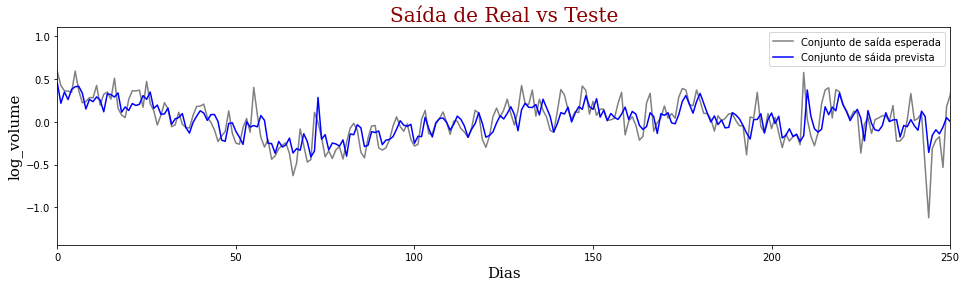

134/134 [==============================] - 1s 4ms/step
R² Test =  0.41533259037877646


In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse_df.csv')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['log_volatility'] = scaler.fit_transform(df[['log_volatility']])

modelo = LSTM((16,1))

x_train, y_train, x_test, y_test = dia_sequencia(5)
modelo.fit(x_train, y_train, batch_size=40, epochs=200, verbose=1)
media = modelo.predict(x_test)
plotResult(y_test, media)


y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)
df_Final['MinMaxScaler'] = score(y_test, y_modelpredict),

print ('R² Test = ', score(y_test, y_modelpredict))

# Utilizando o método ***dia_get_dummies*** para atualização dos dados da coluna de variáveis categoricas day of week

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse_df.csv')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['log_volatility'] = scaler.fit_transform(df[['log_volatility']])

modelo = LSTM((20,1))

x_train, y_train, x_test, y_test = dia_sequencia(5)
x_train = dia_get_dummies(x_train)
x_test = dia_get_dummies(x_test)

modelo.fit(x_train, y_train, batch_size=40, epochs=200, verbose=1)
media = modelo.predict(x_test)


Epoch 1/200
107/107 [==============================] - 3s 11ms/step - loss: 0.0533 - mean_squared_error: 0.0533
Epoch 2/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 3/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 4/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 5/200
107/107 [==============================] - 1s 12ms/step - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 6/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 7/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 8/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 9/200
107/107 [==============================] - 1s 11ms/step - loss: 0.0282 - mean_squared_error:

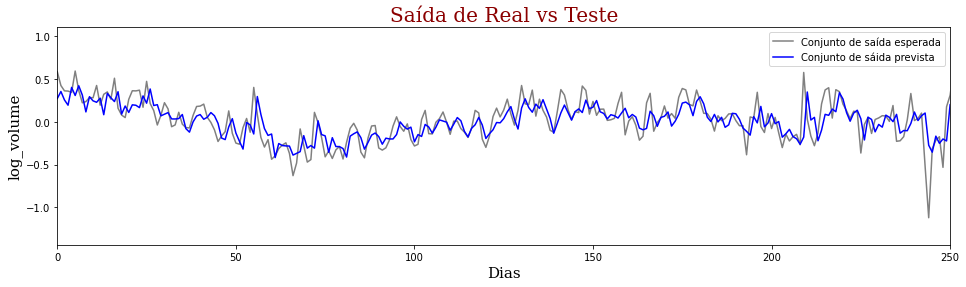

134/134 [==============================] - 0s 3ms/step
R² Test =  0.402146476467272


In [ ]:
plotResult(y_test, media)


y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)
df_Final['Dias - get_dummies'] = score(y_test, y_modelpredict),

print ('R² Test = ', score(y_test, y_modelpredict))

# Utilizando o método ***dia_seno_cosseno*** para atualização dos dados da coluna de variáveis categoricas day of week

In [37]:
# Utilizando o método get_dummies para day of week
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyse_df.csv')

from sklearn.preprocessing import MinMaxScaler
import math
scaler = MinMaxScaler()
df['log_volatility'] = scaler.fit_transform(df[['log_volatility']])

modelo = LSTM((17,1))

x_train, y_train, x_test, y_test = dia_sequencia(5)
x_train = dia_seno_cosseno(x_train)
x_test = dia_seno_cosseno(x_test)

modelo.fit(x_train, y_train, batch_size=40, epochs=200, verbose=1)
media = modelo.predict(x_test)

Epoch 1/200
107/107 [==============================] - 2s 10ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 2/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 3/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 4/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 5/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 6/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 7/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 8/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 9/200
107/107 [==============================] - 1s 10ms/step - loss: 0.0355 - mean_squared_error:

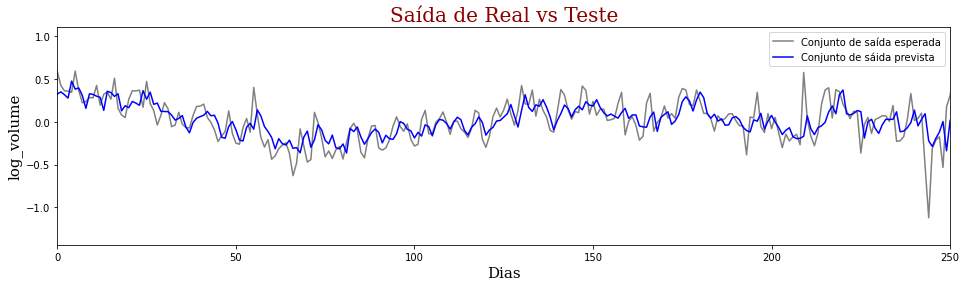

134/134 [==============================] - 1s 4ms/step
R² Test =  0.3982853361810351


In [38]:
plotResult(y_test, media)


y_modelpredict = modelo.predict(x_test)
y_modelTrain = modelo.predict(x_train)
df_Final['Dias - Sen_Cos'] = score(y_test, y_modelpredict),

print ('R² Test = ', score(y_test, y_modelpredict))

In [39]:
df_Final.rename(index={0:"R²"})

,Beta=0.85,Beta=0.90,Dias da Semana,Beta=0.95,Standardization,MinMaxScaler,Dias - Sen_Cos
0,0.379301,0.398907,0.449772,0.391368,0.403173,0.415333,0.398285
